<a href="https://colab.research.google.com/github/durml91/MMath-Project/blob/duo-branch/Image_Diffusion_(working)/Spiral_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import jax.random as jr
%matplotlib inline
import time
import pylab as pl
from IPython import display
from tqdm.notebook import trange, tqdm
import functools as ft

In [44]:
# Data hyper-parameters
N = 1024  # nr of datapoints
vocab_size = 256

# Noise schedule hyper-parameters
beta_min = -8.0  
beta_max = 5.0  

key = jax.random.PRNGKey(seed=2023)
np.random.seed(2023)

In [15]:
theta = np.sqrt(np.random.rand(N)) * 3 * np.pi  # we generate an array of shape (1024,) such that it they are uniform random numbers in [0,1) and then apply a bunch of operatrions on it# np.linspace(0,2*pi,100)
r_a = 0.07 * (2 * theta + np.pi) #mutiply by trig function below by some constant r_a
x = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a])

In [20]:
x = x + 0.02 * np.random.randn(N, 2) 

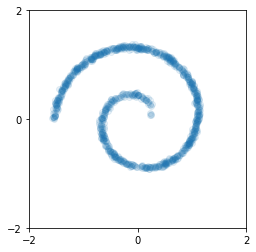

In [21]:
theta = np.sqrt(np.random.rand(N)) * 3 * np.pi  # we generate an array of shape (1024,) such that it they are uniform random numbers in [0,1) and then apply a bunch of operatrions on it
r_a = 0.07 * (2 * theta + np.pi) #mutiply by trig function below by some constant r_a
x = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T #here we produce two rows now of 1024 numbers that have been put through either function respectively - then tranpose so the shape ends up being (1024,2)

x = x + 0.02 * np.random.randn(N, 2) #again we multiply by a bunch of uniform random numbers of the right broadcasting shape

plt.figure().add_subplot(111).set_aspect("equal", adjustable="box")
plt.scatter(x[:, 0], x[:, 1], alpha=0.1) #plot 1st row as x values and 2nd row as y values on the plot
plt.xticks([-2, 0, 2])
plt.yticks([-2, 0, 2])
plt.show()

# Get mean and standard deviation of 'x'
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)

In [31]:
def beta(t):
    b = beta_min
    w = beta_max - beta_min
    return w * t + b

In [63]:
def plot(data, color="blue"):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect("equal", adjustable="box")
    ax.set_xticks([-2, 0, 2])
    ax.set_yticks([-2, 0, 2])
    plt.scatter(data[:, 0], data[:, 1], alpha=0.1, c=color)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

In [34]:
def sample_q_t_x( t, x, key=key):
    t *= jnp.ones((1,)) #convert t to a (1,) dimension array
    var_t = jax.nn.sigmoid(beta(t))[:, None] #jax function to get sigmoid
    eps = jax.random.normal(key, shape=x.shape)
    z_t = jnp.sqrt(1.0 - var_t) * x + jnp.sqrt(var_t) * eps #this is simply the reparamterisation
    return z_t

In [66]:
# rng1, rng2, rng3, rng4 = jax.random.split(key , 4)

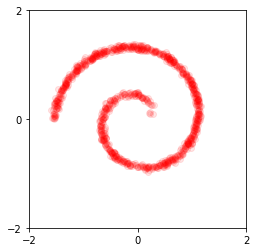

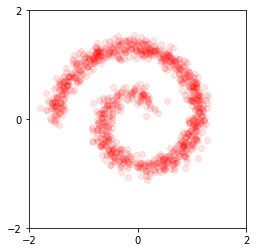

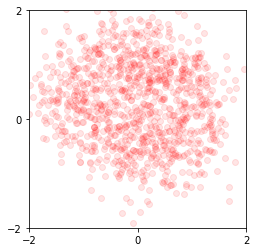

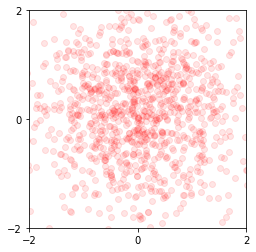

In [70]:
t=0.0
while t < 1.0:
  plot(sample_q_t_x( t, x, key), color="red")
  t += 0.25